In [83]:
from __future__ import division, print_function
import csv
from sklearn.svm import SVC
from sklearn import grid_search
from sklearn.ensemble import RandomForestClassifier as rfc
import seaborn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
champids = {'1': 'Annie',
 '10': 'Kayle',
 '101': 'Xerath',
 '102': 'Shyvana',
 '103': 'Ahri',
 '104': 'Graves',
 '105': 'Fizz',
 '106': 'Volibear',
 '107': 'Rengar',
 '11': 'Master Yi',
 '110': 'Varus',
 '111': 'Nautilus',
 '112': 'Viktor',
 '113': 'Sejuani',
 '114': 'Fiora',
 '115': 'Ziggs',
 '117': 'Lulu',
 '119': 'Draven',
 '12': 'Alistar',
 '120': 'Hecarim',
 '121': "Kha'Zix",
 '122': 'Darius',
 '126': 'Jayce',
 '127': 'Lissandra',
 '13': 'Ryze',
 '131': 'Diana',
 '133': 'Quinn',
 '134': 'Syndra',
 '14': 'Sion',
 '143': 'Zyra',
 '15': 'Sivir',
 '150': 'Gnar',
 '154': 'Zac',
 '157': 'Yasuo',
 '16': 'Soraka',
 '161': "Vel'Koz",
 '17': 'Teemo',
 '18': 'Tristana',
 '19': 'Warwick',
 '2': 'Olaf',
 '20': 'Nunu',
 '201': 'Braum',
 '202': 'Jhin',
 '203': 'Kindred',
 '21': 'Miss Fortune',
 '22': 'Ashe',
 '222': 'Jinx',
 '223': 'Tahm Kench',
 '23': 'Tryndamere',
 '236': 'Lucian',
 '238': 'Zed',
 '24': 'Jax',
 '245': 'Ekko',
 '25': 'Morgana',
 '254': 'Vi',
 '26': 'Zilean',
 '266': 'Aatrox',
 '267': 'Nami',
 '268': 'Azir',
 '27': 'Singed',
 '28': 'Evelynn',
 '29': 'Twitch',
 '3': 'Galio',
 '30': 'Karthus',
 '31': "Cho'Gath",
 '32': 'Amumu',
 '33': 'Rammus',
 '34': 'Anivia',
 '35': 'Shaco',
 '36': 'Dr. Mundo',
 '37': 'Sona',
 '38': 'Kassadin',
 '39': 'Irelia',
 '4': 'Twisted Fate',
 '40': 'Janna',
 '41': 'Gangplank',
 '412': 'Thresh',
 '42': 'Corki',
 '420': 'Illaoi',
 '421': "Rek'Sai",
 '429': 'Kalista',
 '43': 'Karma',
 '432': 'Bard',
 '44': 'Taric',
 '45': 'Veigar',
 '48': 'Trundle',
 '5': 'Xin Zhao',
 '50': 'Swain',
 '51': 'Caitlyn',
 '53': 'Blitzcrank',
 '54': 'Malphite',
 '55': 'Katarina',
 '56': 'Nocturne',
 '57': 'Maokai',
 '58': 'Renekton',
 '59': 'Jarvan IV',
 '6': 'Urgot',
 '60': 'Elise',
 '61': 'Orianna',
 '62': 'Wukong',
 '63': 'Brand',
 '64': 'Lee Sin',
 '67': 'Vayne',
 '68': 'Rumble',
 '69': 'Cassiopeia',
 '7': 'LeBlanc',
 '72': 'Skarner',
 '74': 'Heimerdinger',
 '75': 'Nasus',
 '76': 'Nidalee',
 '77': 'Udyr',
 '78': 'Poppy',
 '79': 'Gragas',
 '8': 'Vladimir',
 '80': 'Pantheon',
 '81': 'Ezreal',
 '82': 'Mordekaiser',
 '83': 'Yorick',
 '84': 'Akali',
 '85': 'Kennen',
 '86': 'Garen',
 '89': 'Leona',
 '9': 'Fiddlesticks',
 '90': 'Malzahar',
 '91': 'Talon',
 '92': 'Riven',
 '96': "Kog'Maw",
 '98': 'Shen',
 '99': 'Lux'}

In [4]:
def getData(filename):
    headers = []
    x = []
    y = []
    with open(filename, "r") as f:
        reader = csv.reader(f)
        for i, row in enumerate(reader):
            if i == 0:
                headers = row
            else:
                x.append(row[:-1])
                y.append(row[-1])
    return x, y, headers

In [5]:
def testRight(clf, x, y):
    right = 0
    p = clf.predict(x)
    for i, ans in enumerate(p):
        if int(ans) == int(y[i]):
            right += 1
    print("Got {} right out of {}. {}%".format(right, len(x), round(right/len(x)*100, 2)))
    return round(right/len(x)*100, 2)

In [6]:
def getTopFeatures(l, n, headers):
    feats = sorted(l)[-1: -(n + 1): -1]
    top = [headers[list(l).index(x)] for x in feats]
    return top

## Bronze Data

In [7]:
bx, by, headers = getData("bronze.csv")

In [8]:
len(bx)

9612

In [9]:
print(headers)

['champ1', 'champ2', 'champ3', 'champ4', 'champ5', 'champ6', 'champ7', 'champ8', 'champ9', 'champ10', 'champ11', 'champ12', 'champ13', 'champ14', 'champ15', 'champ16', 'champ17', 'champ18', 'champ19', 'champ20', 'champ21', 'champ22', 'champ23', 'champ24', 'champ25', 'champ26', 'champ27', 'champ28', 'champ29', 'champ30', 'champ31', 'champ32', 'champ33', 'champ34', 'champ35', 'champ36', 'champ37', 'champ38', 'champ39', 'champ40', 'champ41', 'champ42', 'champ43', 'champ44', 'champ45', 'champ48', 'champ50', 'champ51', 'champ53', 'champ54', 'champ55', 'champ56', 'champ57', 'champ58', 'champ59', 'champ60', 'champ61', 'champ62', 'champ63', 'champ64', 'champ67', 'champ68', 'champ69', 'champ72', 'champ74', 'champ75', 'champ76', 'champ77', 'champ78', 'champ79', 'champ80', 'champ81', 'champ82', 'champ83', 'champ84', 'champ85', 'champ86', 'champ89', 'champ90', 'champ91', 'champ92', 'champ96', 'champ98', 'champ99', 'champ101', 'champ102', 'champ103', 'champ104', 'champ105', 'champ106', 'champ107', 

In [10]:
sp = int(len(bx) * .6)

In [11]:
clf = SVC(kernel="linear", degree=3)
clf.fit(bx[:sp], by[:sp])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
testRight(clf, bx[sp:], by[sp:])

Got 3376 right out of 3845. 87.8%


87.8

# Bronze Data

### Linear SVM

In [14]:
x, y, headers = getData("bronze.csv")
bx, by = x, y
sp = int(len(x) * .6)
bsp = sp
clf = SVC(kernel="linear", degree=1)
bclf = clf
clf.fit(x[:sp], y[:sp])
blsvm = testRight(clf, x[sp:], y[sp:])

Got 3376 right out of 3845. 87.8%


### Random Forest

In [15]:
brfc = rfc(n_estimators=100, max_features="sqrt", max_depth=15)
x, y = bx, by
clf_forest = brfc
sp = bsp
clf_forest.fit(x[:sp], y[:sp])
brfc = clf_forest
brf = testRight(clf_forest, x[sp:], y[sp:])

Got 3379 right out of 3845. 87.88%


In [16]:
getTopFeatures(brfc.feature_importances_, 10, headers)

['firstinhibitor',
 'firstdragon',
 'firsttower',
 'firstbaron',
 'firstriftherald',
 'firstblood',
 'champ54',
 'champ157',
 'champ99',
 'champ236']

### Polynomial 5 Kernel

In [17]:
x, y = bx, by
sp = bsp
klf = SVC(kernel="poly", degree=5, C=20, gamma=10)
klf.fit(x[:sp], y[:sp])
bk = testRight(klf, x[sp:], y[sp:])

Got 3268 right out of 3845. 84.99%


# Silver Data

### Linear SVM

In [18]:
x, y, headers = getData("silver.csv")
sx, sy = x, y
sp = int(len(x) * .6)
ssp = sp
clf = SVC(kernel="linear", degree=1)
sclf = clf
clf.fit(x[:sp], y[:sp])
slsvm = testRight(clf, x[sp:], y[sp:])

Got 8289 right out of 9457. 87.65%


### Random Forest

In [19]:
srfc = rfc(n_estimators=100, max_features="sqrt", max_depth=20)
x, y = sx, sy
clf_forest = srfc
sp = ssp
clf_forest.fit(x[:sp], y[:sp])
srf = testRight(clf_forest, x[sp:], y[sp:])

Got 8306 right out of 9457. 87.83%


In [20]:
getTopFeatures(srfc.feature_importances_, 10, headers)

['firstinhibitor',
 'firstbaron',
 'firstdragon',
 'firsttower',
 'firstriftherald',
 'firstblood',
 'champ81',
 'champ412',
 'champ111',
 'champ236']

In [21]:
champids["81"]

'Ezreal'

### Polynomial 5 Kernel

In [22]:
x, y = sx, sy
sp = ssp
klf = SVC(kernel="poly", degree=5, C=20, gamma=10)
klf.fit(x[:sp], y[:sp])
sk = testRight(klf, x[sp:], y[sp:])

Got 8144 right out of 9457. 86.12%


# Gold Data

In [23]:
x, y, headers = getData("gold.csv")
gx, gy = x, y
sp = int(len(x) * .6)
gsp = sp
clf = SVC(kernel="linear", degree=3)
gclf = clf
clf.fit(x[:sp], y[:sp])
glsvm = testRight(clf, x[sp:], y[sp:])

Got 6371 right out of 7300. 87.27%


### Random Forest

In [25]:
grfc = rfc(n_estimators=100, max_features="sqrt", max_depth=20)
x, y = gx, gy
clf_forest = grfc
sp = gsp
clf_forest.fit(x[:sp], y[:sp])
grfc = clf_forest
grf = testRight(clf_forest, x[sp:], y[sp:])

Got 6384 right out of 7300. 87.45%


In [26]:
getTopFeatures(grfc.feature_importances_, 10, headers)

['firstinhibitor',
 'firstbaron',
 'firsttower',
 'firstdragon',
 'firstblood',
 'firstriftherald',
 'champ236',
 'champ81',
 'champ111',
 'champ99']

### Polynomial 5 Kernel

In [27]:
x, y = gx, gy
sp = gsp
klf = SVC(kernel="poly", degree=5, C=20, gamma=10)
klf.fit(x[:sp], y[:sp])
gk = testRight(klf, x[sp:], y[sp:])

Got 6246 right out of 7300. 85.56%


# Platinum Data

### Linear SVM

In [28]:
x, y, headers = getData("platinum.csv")
px, py = x, y
sp = int(len(x) * .6)
psp = sp
clf = SVC(kernel="linear", degree=3)
pclf = clf
clf.fit(x[:sp], y[:sp])
plsvm = testRight(clf, x[sp:], y[sp:])

Got 5350 right out of 6066. 88.2%


### Random Forest

In [29]:
prfc = rfc(n_estimators=100, max_features="sqrt", max_depth=20)
x, y = px, py
clf_forest = prfc
sp = psp
clf_forest.fit(x[:sp], y[:sp])
prf = testRight(clf_forest, x[sp:], y[sp:])

Got 5347 right out of 6066. 88.15%


In [30]:
getTopFeatures(prfc.feature_importances_, 10, headers)

['firstinhibitor',
 'firstbaron',
 'firsttower',
 'firstdragon',
 'firstblood',
 'firstriftherald',
 'champ236',
 'champ81',
 'champ40',
 'champ111']

### Polynomial 5 Kernel

In [31]:
x, y = px, py
sp = psp
klf = SVC(kernel="poly", degree=5, C=20, gamma=10)
# klf = grid_search.GridSearchCV(klf, {"kernel":("poly",), "C": [1, 50, 100], "gamma": [1, 2, 5, 10, 100]})
klf.fit(x[:sp], y[:sp])
pk = testRight(klf, x[sp:], y[sp:])

Got 5206 right out of 6066. 85.82%


## Diamond Data

### Linear SVM

In [32]:
x, y, headers = getData("Diamond.csv")
dx, dy = x, y
sp = int(len(x) * .6)
dsp = sp
clf = SVC(kernel="linear", degree=3)
dclf = clf
clf.fit(x[:sp], y[:sp])
dlsvm = testRight(clf, x[sp:], y[sp:])

Got 8219 right out of 9282. 88.55%


### Random Forest

In [33]:
drfc = rfc(n_estimators=100, max_features="sqrt", max_depth=20)
x, y = dx, dy
clf_forest = drfc
sp = dsp
clf_forest.fit(x[:sp], y[:sp])
drf = testRight(clf_forest, x[sp:], y[sp:])

Got 8232 right out of 9282. 88.69%


In [34]:
getTopFeatures(drfc.feature_importances_, 10, headers)

['firstinhibitor',
 'firstbaron',
 'firsttower',
 'firstdragon',
 'firstriftherald',
 'firstblood',
 'champ40',
 'champ236',
 'champ81',
 'champ64']

### Kernel Polynomial 5

In [35]:
x, y = dx, dy
sp = dsp
klf = SVC(kernel="poly", degree=5, C=1, gamma=10)
klf.fit(x[:sp], y[:sp])
dk = testRight(klf, x[sp:], y[sp:])

Got 8108 right out of 9282. 87.35%


# Master Data

### Linear SVM

In [36]:
x, y, headers = getData("master.csv")
mx, my = x, y
sp = int(len(x) * .6)
msp = sp
clf = SVC(kernel="linear", degree=3)
# clf = grid_search.GridSearchCV(clf, {"kernel":("linear",), "C": [1, 10, 20], "gamma": [1, 50, 100]})
mclf = clf
clf.fit(x[:sp], y[:sp])
mlsvm = testRight(clf, x[sp:], y[sp:])

Got 1894 right out of 2123. 89.21%


### Random Forest

In [37]:
mrfc = rfc(n_estimators=100, max_features="sqrt", max_depth=15)
x, y = mx, my
clf_forest = mrfc
sp = msp
clf_forest.fit(x[:sp], y[:sp])
mrf = testRight(clf_forest, x[sp:], y[sp:])

Got 1891 right out of 2123. 89.07%


In [38]:
getTopFeatures(mrfc.feature_importances_, 10, headers)

['firstinhibitor',
 'firstbaron',
 'firsttower',
 'firstdragon',
 'firstblood',
 'firstriftherald',
 'champ40',
 'champ236',
 'champ81',
 'champ111']

In [39]:
champids["40"]

'Janna'

### Polynomial 5 Kernel

In [40]:
x, y = mx, my
sp = msp
klf = SVC(kernel="poly", degree=5, C=20, gamma=10)
# klf = grid_search.GridSearchCV(klf, {"kernel":("poly",), "C": [1, 50, 100], "gamma": [1, 2, 5, 10, 100]})
klf.fit(x[:sp], y[:sp])
mk = testRight(klf, x[sp:], y[sp:])

Got 1837 right out of 2123. 86.53%


# Challenger Data

### Linear SVM

In [42]:
x, y, headers = getData("challenger.csv")
cx, cy = x, y
sp = int(len(x) * .6)
csp = sp
clf = SVC(kernel="linear", degree=1, gamma=3, C=20)
# clf = grid_search.GridSearchCV(clf, {"kernel":("linear",), "C": [1, 10, 20], "gamma": [1, 50, 100]})
cclf = clf
clf.fit(x[:sp], y[:sp])
clsvm = testRight(clf, x[sp:], y[sp:])

Got 731 right out of 841. 86.92%


### Random Forest

In [43]:
crfc = rfc(n_estimators=100, max_features="sqrt", max_depth=15)
x, y = cx, cy
clf_forest = crfc
sp = csp
clf_forest.fit(x[:sp], y[:sp])
crf = testRight(clf_forest, x[sp:], y[sp:])

Got 739 right out of 841. 87.87%


In [44]:
getTopFeatures(crfc.feature_importances_, 10, headers)

['firstinhibitor',
 'firstbaron',
 'firsttower',
 'firstdragon',
 'firstriftherald',
 'firstblood',
 'champ236',
 'champ60',
 'champ40',
 'champ111']

### Polynomial 5 Kernel

In [76]:
x, y = cx, cy
sp = csp
klf = SVC(kernel="poly", degree=5, C=1, gamma=10)
# klf = grid_search.GridSearchCV(klf, {"kernel":("poly",), "degree": (1,2,3,4,5), "C": [1, 50, 100], "gamma": [1, 10, 100]})
klf.fit(x[:sp], y[:sp])
ck = testRight(klf, x[sp:], y[sp:])

Got 663 right out of 841. 78.83%


# Plotting some data

In [111]:
% matplotlib inline
# % matplotlib qt

In [82]:
accuracies = [blsvm, brf, bk, slsvm, srf, sk, glsvm, grf, gk, plsvm, prf, pk, dlsvm, drf, dk, mlsvm, mrf, mk, clsvm, crf, ck]
svm_acc = [accuracies[i] for i in range(0, len(accuracies), 3)]
rf_acc = [accuracies[i] for i in range(1, len(accuracies), 3)]
k_acc = [accuracies[i] for i in range(2, len(accuracies), 3)]

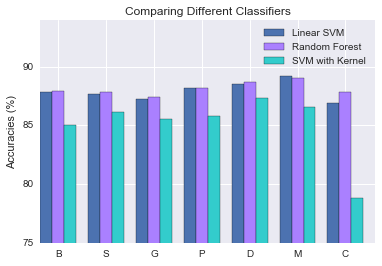

In [112]:
N = 7
ind = np.arange(N)
width = .25

fig, ax = plt.subplots()
rects1 = ax.bar(ind, svm_acc, width)
rects2 = ax.bar(ind + width, rf_acc, width, color="#aa80ff")
rects3 = ax.bar(ind + 2*width, k_acc, width, color="#33cccc")

ax.set_ylabel("Accuracies (%)")
ax.set_title("Comparing Different Classifiers")
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(("B", "S", "G", "P", "D", "M", "C"))
ax.set_ylim([75,94])

ax.legend((rects1[0], rects2[0], rects3[0]), ("Linear SVM", "Random Forest", "SVM with Kernel"))

plt.show()